In [56]:
#import nessessory libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.optimize import curve_fit
from numpy.polynomial import Polynomial as Poly
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [58]:
# dataset is loaded
mall_data = pd.read_csv('Mall_Customers.csv')

# missing values ate filled by taking mean of columns
mall_data.fillna(mall_data.mean(numeric_only=True), inplace=True)

#data is standardized
scaler = StandardScaler()
mall_data_scaled = mall_data.copy()
mall_data_scaled[["Annual Income (k$)", "Spending Score (1-100)"]] = scaler.fit_transform(
    mall_data[["Annual Income (k$)", "Spending Score (1-100)"]])


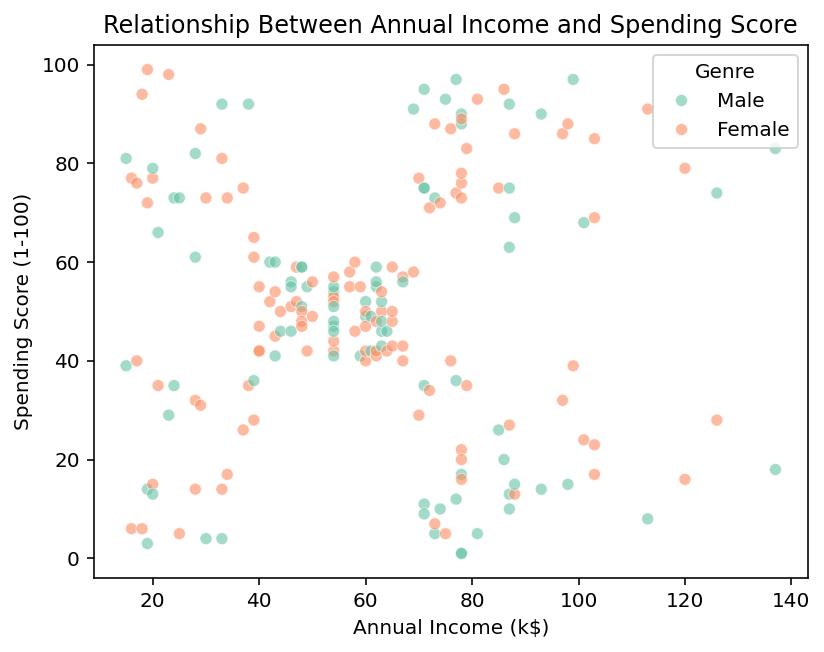

In [60]:
def plot_relational_graph(mall_data):
    """
    plotted a scatter plot which shows relationship between annual income and spending score of male and female
    """
    plt.figure(dpi=144)
    
    # scatter plot is created
    sns.scatterplot(data=mall_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', palette='Set2', alpha=0.6)
    
    # title and label for axis are are added
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Relationship Between Annual Income and Spending Score')
    
    # functon is called and plot is shown
    plt.show()
plot_relational_graph(mall_data)

C:\Users\AGHA SAUD\AppData\Local\Temp\ipykernel_10740\2083204922.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Annual Income (k$)', data=mall_data, palette='Set2')
C:\Users\AGHA SAUD\AppData\Local\Temp\ipykernel_10740\2083204922.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Spending Score (1-100)', data=mall_data, palette='Set2')


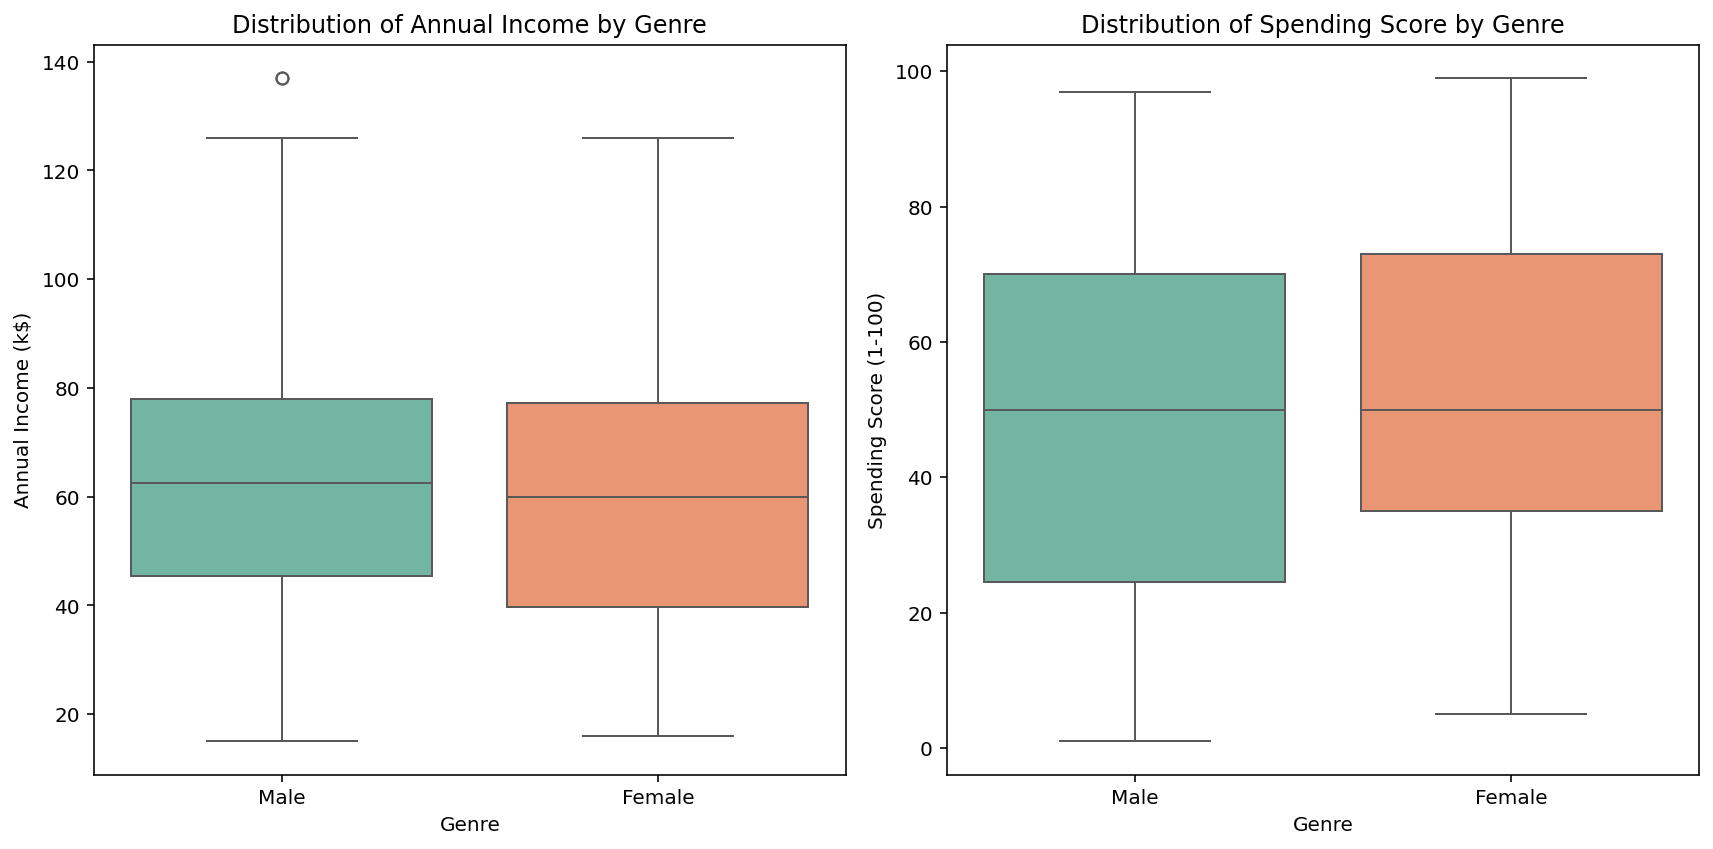

In [62]:
def plot_boxplot(mall_data):
    """
    boxplot to show the distribution of spending score and annual income by genre
    """
    # a figure is created of size 12x6 inches
    plt.figure(dpi=144, figsize=(12, 6))

    # anuual income plot is plotted
    plt.subplot(1, 2, 1) 
    sns.boxplot(x='Genre', y='Annual Income (k$)', data=mall_data, palette='Set2')
    plt.title('Distribution of Annual Income by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Annual Income (k$)')

    # spending score plot is created
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Genre', y='Spending Score (1-100)', data=mall_data, palette='Set2')
    plt.title('Distribution of Spending Score by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Spending Score (1-100)')

    # layout is adjusted, functon is called and plot is shown
    plt.tight_layout()
    plt.show()
plot_boxplot(mall_data)

C:\Users\AGHA SAUD\AppData\Local\Temp\ipykernel_10740\2215263587.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xline, yline, 'k-', color='red')


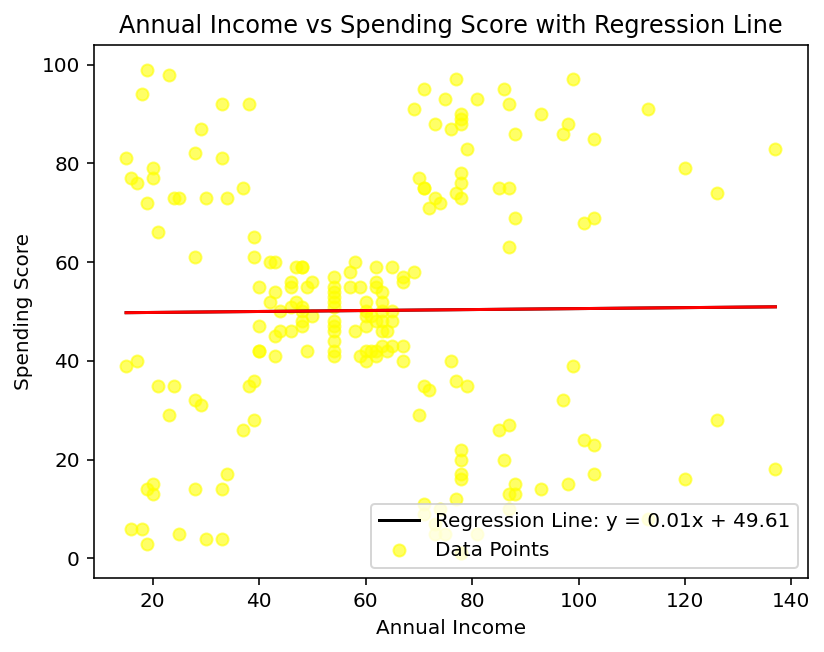

In [64]:
#values are assighned to x and y
x = mall_data['Annual Income (k$)']
y = mall_data['Spending Score (1-100)']

def linfunc(x, a, b):   
    """
    function for fitting a linear line
    """
    y = a * x + b
    return y
    
# Fit the line using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Generate x values for the line plot 
xline = np.linspace(np.min(x), np.max(x), 100)
yline = linfunc(xline, slope, intercept)

def plot_line_with_scatter(x, y, xline, yline):  
    """
  Creates a scatter plot of annual income and spending score with regression line
    """
    
    # figure is created
    plt.figure(dpi=144)

    #plot the regression line
    plt.plot(xline, yline, 'k-', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
    plt.plot(xline, yline, 'k-', color='red')
    
    # Scatter plot of the data points
    plt.scatter(x, y, color='yellow', label='Data Points', alpha=0.6)
    
    
    # titles and labels are added to figure
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.title('Annual Income vs Spending Score with Regression Line')
    
    # functon is called and plot is shown
    plt.show()
plot_line_with_scatter(x, y, xline, yline)

C:\Users\AGHA SAUD\AppData\Local\Temp\ipykernel_10740\450096652.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xline, yline, 'k-', color='red', label=f'Fitted Line: y = {slope:.2f}x + {intercept:.2f}')


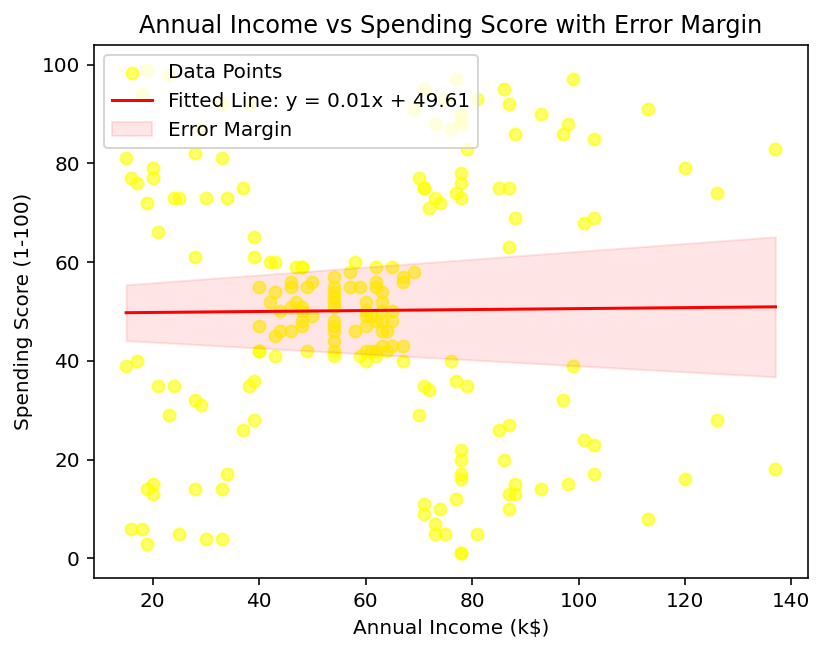

In [66]:
def plot_regression_with_error_margin(x, y):
    """
    Plots the data points, linear regression line, and error margin for the linear fit.
    """
    
    # give it the function to be fitted then x and y
    p, cov = curve_fit(linfunc, x, y)

    # the errors are the square root of the diagonal of the covariance matrix
    sigma = np.sqrt(np.diag(cov))
    
    # Generate x values for the line plot
    xfit = np.linspace(np.min(x), np.max(x), 100)
    yfit = linfunc(xfit, slope, intercept)

    # figure is created
    plt.figure(dpi=144)
  
    # Scatter plot of the data points
    plt.scatter(x, y, color='yellow', label='Data Points', alpha=0.6)

    #regression line is created
    plt.plot(xline, yline, 'k-', color='red', label=f'Fitted Line: y = {slope:.2f}x + {intercept:.2f}')

    # error margins are added as shaded regions around the regression line using the formula
    plt.fill_between(xfit, linfunc(xfit, p[0] - sigma[0], p[1] - sigma[1]),
                    linfunc(xfit, p[0] + sigma[0], p[1] + sigma[1]),
                    color='red', alpha=0.1, label='Error Margin')
    
    #lablels and titles are added to figure
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.title('Annual Income vs Spending Score with Error Margin')
    
    # function for plotting is called and figure is dispalyed
    plt.show()
plot_regression_with_error_margin(x, y)


In [68]:
# Select columns for normalization
data = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Normalize the data to range [0, 1]
scaler = MinMaxScaler()
norm = scaler.fit_transform(data)

In [70]:
# Function to calculate silhouette score and inertia
def one_silhouette_inertia(n, c):
    """
    Calculates the silhoutte score for n clusters
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(c)

    # calculate the silhoutte score
    score = silhouette_score(data, labels)  # Silhouette Score
    inertia = kmeans.inertia_  # WCSS / Inertia
    return score, inertia
    
# Determine the best number of clusters using silhouette score
wcss = []  # To store WCSS for each K
best_n, best_score = None, -np.inf  # Best K and its silhouette score

# test and print the best cluster size
for n in range(2, 11):
    score, inertia = one_silhouette_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhouette score = {score:0.2f}")
print(f"\nBest number of clusters = {best_n:2g}")

C:\Users\AGHA SAUD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AGHA SAUD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 2 clusters silhouette score = 0.31
 3 clusters silhouette score = 0.44


C:\Users\AGHA SAUD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AGHA SAUD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 4 clusters silhouette score = 0.49
 5 clusters silhouette score = 0.55


C:\Users\AGHA SAUD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 6 clusters silhouette score = 0.52
 7 clusters silhouette score = 0.46


C:\Users\AGHA SAUD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AGHA SAUD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 8 clusters silhouette score = 0.46
 9 clusters silhouette score = 0.42


C:\Users\AGHA SAUD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AGHA SAUD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 clusters silhouette score = 0.44

Best number of clusters =  5


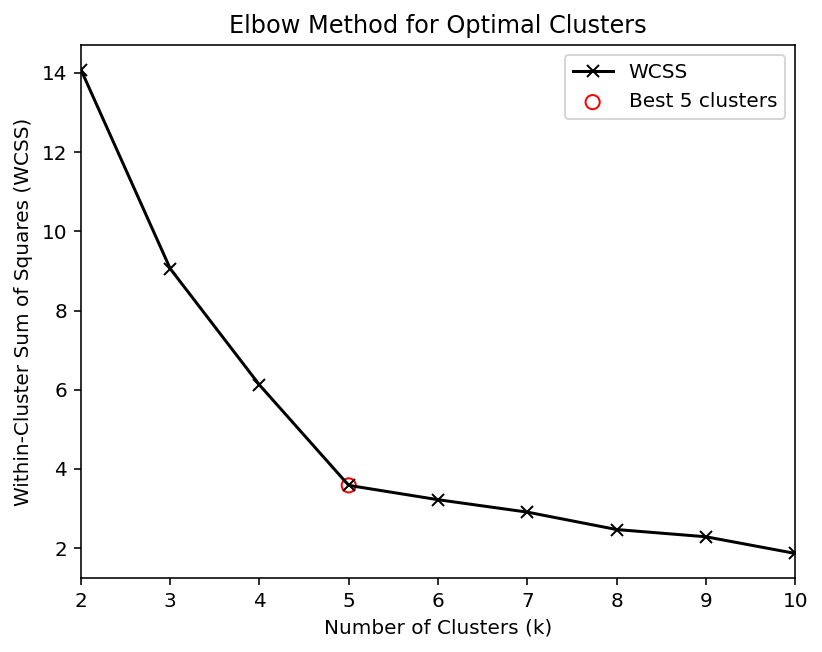

In [71]:
# Function to plot the elbow method
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between minimum cluster, maximum cluster and WCSS values for each k with the best number of clusters.
    """
    fig, ax = plt.subplots(dpi=144)
    
    # Plot the WCSS for each number of clusters
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-', label='WCSS')
    
    # Highlight the best number of clusters
    ax.scatter(best_n, wcss[best_n - min_k], marker='o', color='red', facecolors='none', s=50, label=f'Best {best_n} clusters')
   
    #setting titles and lablels for plot
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
    ax.set_xlim(min_k, max_k)
    ax.set_title('Elbow Method for Optimal Clusters')
    ax.legend()
    
    # function for plotting is called and figure is dispalyed
    plt.show()
plot_elbow_method(2, 10, wcss, best_n)

C:\Users\AGHA SAUD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AGHA SAUD\AppData\Local\Temp\ipykernel_10740\2109826615.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bs" (-> marker='s'). The keyword argument will take precedence.
  ax.plot(xkmeans, ykmeans, 'bs', marker='x', color='red', ms=10, label='Estimated Centres')
C:\Users\AGHA SAUD\AppData\Local\Temp\ipykernel_10740\2109826615.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  ax.plot(xkmeans, ykmeans, 'bs', marker='x', color='red', ms=10, label='Estimated Centres')


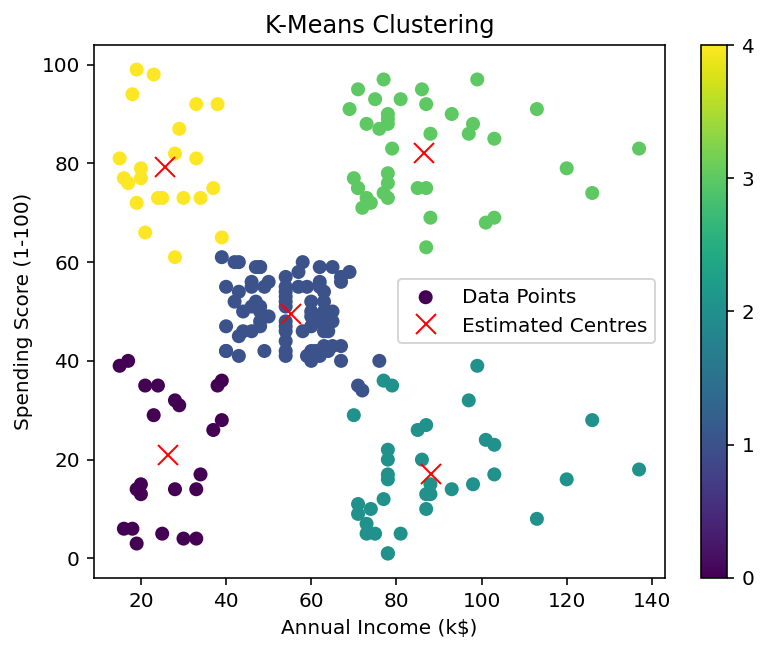

In [77]:
def plot_fitted_clusters():
    """
    Plots clustered data as a scatter plot with determined centres calcualted
    """
    # Combine x and y into a 2D array for clustering
    xy = np.column_stack((x, y))

    # Set the number of clusters
    ncluster = 5

    # Set up the KMeans clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=ncluster, n_init=20)

    # Fit the model to the data
    kmeans.fit(xy)

    # Get the labels for each data point (cluster assignment)
    labels = kmeans.labels_

    # Get the estimated cluster centers
    cen = kmeans.cluster_centers_
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    fig, ax = plt.subplots(dpi=144)
    
    # Scatter plot of the data, colored by cluster labels
    s = ax.scatter(x, y, c=labels, cmap='viridis', marker='o', label='Data Points')
    
    # Plot the estimated cluster centers
    ax.plot(xkmeans, ykmeans, 'bs', marker='x', color='red', ms=10, label='Estimated Centres')

    # Color bar for the scatter plot
    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    
    # Labels and legend
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Spending Score (1-100)')
    ax.legend()
    ax.set_title('K-Means Clustering')
    plt.show()

# Call the function to plot the results
plot_fitted_clusters()